In [1]:
from skimage import io, exposure

import numpy as np
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import time

C:\Users\barisin\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as sched

In [3]:
from scipy.fft import ifftn, fftn, fft2, ifft2

In [4]:
def count_parameters(model): return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [5]:
def MinMaxNormalization(tensor):
    #min max normalization
    v_min, v_max = tensor.min(), tensor.max()
    tensor = (tensor - v_min)/(v_max - v_min)
    return tensor

In [6]:
def ReadAndCrop256Img(path):
    input_img = io.imread(path)
    temp = input_img[0,0:64,0:64]
    output_img = torch.from_numpy(temp).float()
    output_img = output_img.reshape([1,1,64,64])
    
    for i in range(3):
        for j in range(3):
            for k in range(3):
                temp = input_img[64*i,(j*64):((j+1)*64), (k*64):((k+1)*64)]
                output_img_temp = torch.from_numpy(temp).float()
                output_img_temp = output_img_temp.reshape([1,1,64,64])
                output_img = torch.cat((output_img,output_img_temp), dim = 0)
    
    return output_img


def ReadAndCrop256ImgNorm(path):
    input_img = io.imread(path)
    temp = input_img[0,0:64,0:64]
    output_img = torch.from_numpy(temp).float()
    output_img = output_img.reshape([1,1,64,64])
    
    for i in range(3):
        for j in range(3):
            for k in range(3):
                temp = input_img[64*i,(j*64):((j+1)*64), (k*64):((k+1)*64)]
                output_img_temp = torch.from_numpy(temp).float()
                output_img_temp = output_img_temp.reshape([1,1,64,64])
                output_img_temp = MinMaxNormalization(output_img_temp)
                output_img = torch.cat((output_img,output_img_temp), dim = 0)
    
    return output_img

In [7]:
def ReadAndCrop256ImgAug(path):
    input_img = io.imread(path)
    temp = input_img[0,0:64,0:64]
    output_img = torch.from_numpy(temp).float()
    output_img = output_img.reshape([1,1,64,64])
    
    for i in range(24):
        for j in range(3):
            for k in range(3):
                temp = input_img[8*i,(j*64):((j+1)*64), (k*64):((k+1)*64)]
                output_img_temp = torch.from_numpy(temp).float()
                #augmentation flip
                output_img_temp2 = torch.from_numpy(temp).float()
                output_img_temp2 = torch.flip(output_img_temp2, [0,1])
                #augmentation rotation 90
                output_img_temp3 = torch.from_numpy(temp).float()
                output_img_temp3 = torch.rot90(output_img_temp3)
                #reshape all 3 images
                output_img_temp = output_img_temp.reshape([1,1,64,64])
                output_img_temp2 = output_img_temp2.reshape([1,1,64,64])
                output_img_temp3 = output_img_temp3.reshape([1,1,64,64])
                output_img = torch.cat((output_img,output_img_temp, output_img_temp2, output_img_temp3), dim = 0)
    
    return output_img


def ReadAndCrop256ImgNormAug(path):
    input_img = io.imread(path)
    temp = input_img[0,0:64,0:64]
    output_img = torch.from_numpy(temp).float()
    output_img = output_img.reshape([1,1,64,64])
    
    for i in range(24):
        for j in range(3):
            for k in range(3):
                temp = input_img[8*i,(j*64):((j+1)*64), (k*64):((k+1)*64)]
                output_img_temp = torch.from_numpy(temp).float()
                #augmentation flip
                output_img_temp2 = torch.from_numpy(temp).float()
                output_img_temp2 = torch.flip(output_img_temp2, [0,1])
                #augmentation rotation 90
                output_img_temp3 = torch.from_numpy(temp).float()
                output_img_temp3 = torch.rot90(output_img_temp3)
                #reshape all 3 images
                output_img_temp = output_img_temp.reshape([1,1,64,64])
                output_img_temp2 = output_img_temp2.reshape([1,1,64,64])
                output_img_temp3 = output_img_temp3.reshape([1,1,64,64])
                output_img_temp = MinMaxNormalization(output_img_temp)
                output_img_temp2 = MinMaxNormalization(output_img_temp2)
                output_img_temp3 = MinMaxNormalization(output_img_temp3)
                output_img = torch.cat((output_img,output_img_temp, output_img_temp2, output_img_temp3), dim = 0)
    
    return output_img

In [8]:
def ReadTrainingSet(path_list):
    output = torch.zeros(1,1,64,64)
    for path in path_list:
        output = torch.cat((output, ReadAndCrop256Img(path)), dim = 0)
    output = output[1:,:,:,:]
    return output

def ReadTrainingSetNorm(path_list):
    output = torch.zeros(1,1,64,64)
    for path in path_list:
        output = torch.cat((output, ReadAndCrop256ImgNorm(path)), dim = 0)
    output = output[1:,:,:,:]
    return output

def ReadTrainingSetAug(path_list):
    output = torch.zeros(1,1,64,64)
    for path in path_list:
        output = torch.cat((output, ReadAndCrop256ImgAug(path)), dim = 0)
    output = output[1:,:,:,:]
    return output

def ReadTrainingSetNormAug(path_list):
    output = torch.zeros(1,1,64,64)
    for path in path_list:
        output = torch.cat((output, ReadAndCrop256ImgNormAug(path)), dim = 0)
    output = output[1:,:,:,:]
    return output

In [9]:
path_list_input_val = [ ]
path_list_input_val.append("dataset_cracks/input_val/crack_1_256_w3_2.tif")

path_list_label_val = [ ]
path_list_label_val.append("dataset_cracks/label_val/crack_1_256_w3_2.tif")

path_list_weight_val = [ ]
path_list_weight_val.append("dataset_cracks/weight_val/crack_1_256_w3_2.tif")

In [10]:
path_list_input = [ ]
path_list_input.append("dataset_cracks/input/crack_1_256_w3_1.tif")
path_list_input.append("dataset_cracks/input/crack_2_256_w3_6.tif")
path_list_input.append("dataset_cracks/input/crack_2_256_w3_10.tif")

path_list_label = [ ]
path_list_label.append("dataset_cracks/labels/crack_1_256_w3_1.tif")
path_list_label.append("dataset_cracks/labels/crack_2_256_w3_6.tif")
path_list_label.append("dataset_cracks/labels/crack_2_256_w3_10.tif")

path_list_weight = [ ]
path_list_weight.append("dataset_cracks/label+weights/crack_1_256_w3_1.tif")
path_list_weight.append("dataset_cracks/label+weights/crack_2_256_w3_6.tif")
path_list_weight.append("dataset_cracks/label+weights/crack_2_256_w3_10.tif")


test_x2 = ReadTrainingSetNorm(path_list_input)
print(test_x2.size())

test_y2 = ReadTrainingSet(path_list_label)
print(test_y2.size())

test_w2 = ReadTrainingSet(path_list_weight)
print(test_w2.size())

torch.Size([84, 1, 64, 64])
torch.Size([84, 1, 64, 64])
torch.Size([84, 1, 64, 64])


In [11]:
def ReadTrainingSetWithRotation(path_list):
    output_img = torch.empty(5,3,0)
    for path in path_list:
        output = torch.cat((output, ReadAndCrop256Img(path)), dim = 0)
        #output = torch.cat((output, torch.))
    return output

In [12]:
def MakeRange(size_n):
    output = np.zeros(size_n)
    center = int(size_n/2)
    for i in range(size_n):
        output[i] = (i-center)/(size_n - (size_n%2))
    return output

# RieszNet

In [13]:
def RieszKernelVar(s_x, s_y, order):
    #get riesz kernel in fourier domain
    size_x = s_x
    size_y = s_y
    Riesz_kernel = np.zeros([size_x, size_y], dtype=complex)
    gx = MakeRange(size_x)
    gy = MakeRange(size_y)
    for i in range(size_x):
        for j in range(size_y):
            den = gx[i]*gx[i]+gy[j]*gy[j]
            if den > 1e-08:
                if(order[0] == 0 and order[1] == 1):
                    den = np.sqrt(den)
                    Riesz_kernel[i,j] = complex(0,-gy[j]/den)
                if(order[0] == 1 and order[1] == 0):
                    den = np.sqrt(den)
                    Riesz_kernel[i,j] = complex(0,-gx[i]/den)
                if(order[0] == 2 and order[1] == 0):
                    Riesz_kernel[i,j] = complex(gx[i]*gx[i]/den,0)
                if(order[0] == 1 and order[1] == 1):
                    Riesz_kernel[i,j] = complex(gx[i]*gy[j]/den,0)
                if(order[0] == 0 and order[1] == 2):
                    Riesz_kernel[i,j] = complex(gy[j]*gy[j]/den,0)
    Riesz_kernel2 = torch.from_numpy(Riesz_kernel)
    Riesz_kernel2= Riesz_kernel2.reshape([1,1,size_x,size_y])
    return Riesz_kernel2

In [14]:
class RieszLayer(nn.Module):
    def __init__(self, order):
        super(RieszLayer, self).__init__()

        self.order = order
        self.size_x = 64
        self.size_y = 64
        self.Riesz_fft = RieszKernelVar(self.size_x,self.size_y, self.order)
 
    def forward(self, x):
        #Riesz_fft = RieszKernel(x, self.order)
        if x.size()[2] != self.size_x or x.size()[3] != self.size_y:
            self.size_x = x.size()[2]
            self.size_y = x.size()[3]
            self.Riesz_fft = RieszKernelVar(self.size_x, self.size_y, self.order)
            

        x = x*self.Riesz_fft

        return x
    
class RieszNet(nn.Module):

    def __init__(self):
        super(RieszNet, self).__init__()
        self.order1 = [1, 0]
        self.order2 = [0, 1]
        self.Rx = RieszLayer(self.order1)
        self.Ry = RieszLayer(self.order2)

    def forward(self, x):

        x = torch.fft.fft2(x)
        x = torch.fft.fftshift(x, dim = [2,3])
        x1 = self.Rx(x)
        x2 = self.Ry(x)
        x3 = -self.Rx(x1)
        x4 = -self.Rx(x2)
        x5 = -self.Ry(x2)
 
        x = torch.cat((x1, x2, x3, x4, x5), dim=1)
        x = torch.fft.ifftshift(x, dim = [2,3])
        x = torch.real(torch.fft.ifft2(x)).double()
        
        return x

class RieszNetDeep(nn.Module):

    def __init__(self):
        super(RieszNetDeep, self).__init__()
        self.conv1 = nn.Conv2d(5,16,kernel_size = (1,1))
        self.conv2 = nn.Conv2d(80,32,kernel_size = (1,1))
        self.conv3 = nn.Conv2d(160,40,kernel_size = (1,1))
        self.conv4 = nn.Conv2d(200,48,kernel_size = (1,1))
        self.conv5 = nn.Conv2d(48,1,kernel_size = (1,1))
        
        self.bn1 = nn.BatchNorm2d(16, affine=False)
        self.bn2 = nn.BatchNorm2d(32, affine=False)
        self.bn3 = nn.BatchNorm2d(40, affine=False)
        self.bn4 = nn.BatchNorm2d(48, affine=False)
        
        self.GL1 = RieszNet()


    def forward(self, y):
        
        #GL0 = GaussianLayer(self.st_dev, [0,0])
        #1st Riesz layer
        x = self.GL1(y)
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        #2nd Riesz layer
        x = self.GL1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        #3rd Riesz layer
        x = self.GL1(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = F.relu(x)
        #4th Riesz layer
        x = self.GL1(x)
        x = self.conv4(x)
        x = self.bn4(x)
        x = F.relu(x)
        #final layer
        x = self.conv5(x)
        x = F.sigmoid(x)
        return x

# Train

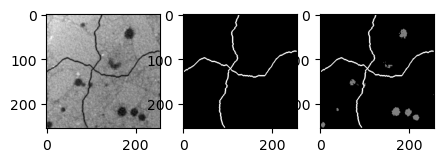

In [15]:
path_input = 'dataset_cracks/input/crack_2_256_w3_6.tif'
test_full = io.imread(path_input)
temp1 = test_full[1,:,:]
test = torch.from_numpy(temp1).float()
test_full2 = test.reshape([1,1,256,256])
test_full2 = MinMaxNormalization(test_full2)


path_label = 'dataset_cracks/labels/crack_2_256_w3_6.tif'
test_fully = io.imread(path_label)
temp2 = test_fully[1,:,:]
test = torch.from_numpy(temp2).float()
test_fully2 = test.reshape([1,1,256,256])


path_weight = 'dataset_cracks/label+weights/crack_2_256_w3_6.tif'
test_fullw = io.imread(path_weight)
temp3 = test_fullw[1,:,:]
test = torch.from_numpy(temp3).float()
test_fullyw = test.reshape([1,1,256,256])


fig, ax = plt.subplots(1,3, figsize=(5,5))
ax[0].imshow(temp1, cmap='gray')
ax[1].imshow(temp2, cmap='gray')
ax[2].imshow(temp3, cmap='gray')

In [24]:
LN = RieszNetDeep()

count_parameters(LN)

18825

In [17]:
ReflPad = nn.ReflectionPad2d(20)
ZerPad = nn.ZeroPad2d(20)

test_x2 = ReadTrainingSetNormAug(path_list_input)
print(test_x2.size())
test_x2 = ReflPad(test_x2)
print(test_x2.size())

test_y2 = ReadTrainingSetAug(path_list_label)
print(test_y2.size())
test_y2 = ZerPad(test_y2)
print(test_y2.size())

test_w2 = ReadTrainingSetAug(path_list_weight)
print(test_w2.size())
test_w2 = ZerPad(40*test_w2+1)
print(test_w2.size())

torch.Size([1947, 1, 64, 64])
torch.Size([1947, 1, 104, 104])
torch.Size([1947, 1, 64, 64])
torch.Size([1947, 1, 104, 104])
torch.Size([1947, 1, 64, 64])
torch.Size([1947, 1, 104, 104])


In [18]:
test_x2 = test_x2.double()
test_y2 = test_y2.double()
test_w2 = test_w2.double()

In [19]:
val_x2 = ReadTrainingSetNormAug(path_list_input_val)
print(val_x2.size())
val_x2 = ReflPad(val_x2)
print(val_x2.size())

val_y2 = ReadTrainingSetAug(path_list_label_val)
print(val_y2.size())
val_y2 = ZerPad(val_y2)
print(val_y2.size())

val_w2 = ReadTrainingSetAug(path_list_weight_val)
print(val_w2.size())
val_w2 = ZerPad(40*val_w2+1)
print(val_w2.size())

val_x2 = val_x2.double()
val_y2 = val_y2.double()
val_w2 = val_w2.double()

torch.Size([649, 1, 64, 64])
torch.Size([649, 1, 104, 104])
torch.Size([649, 1, 64, 64])
torch.Size([649, 1, 104, 104])
torch.Size([649, 1, 64, 64])
torch.Size([649, 1, 104, 104])


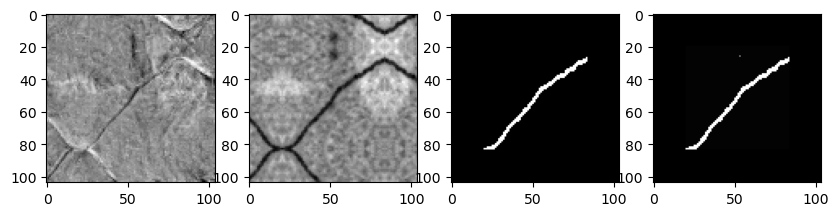

In [20]:
test_x2 = test_x2.double()
LN = LN.double()
k = LN(test_x2[9:10,0:1,:,:])

k1 = k[0,0,:,:].detach().numpy()
test1 = test_x2[9,0,:,:].detach().numpy()
test2 = test_y2[9,0,:,:].detach().numpy()
test3 = test_w2[9,0,:,:].detach().numpy()

fig, ax = plt.subplots(1,4, figsize=(10,10))
ax[0].imshow(k1, cmap='gray')
ax[1].imshow(test1, cmap='gray')
ax[2].imshow(test2, cmap='gray')
ax[3].imshow(test3, cmap='gray')

In [25]:
import time
import gc
import sys

gc.collect()
weights = test_w2

712

In [26]:
model = LN.double()

n_epochs = 25 # or whatever
batch_size = 11 # or whatever
train_num = 1947

optimizer = optim.Adam(model.parameters(), lr = 0.001)
scheduler = sched.StepLR(optimizer, step_size=20, gamma=0.5)

input = test_x2
target = test_y2
input_w = weights

criterion_val = nn.BCELoss(weight=val_w2[:50])
model.train()

for epoch in range(n_epochs):

    # X is a torch Variable
    permutation = torch.randperm(train_num)
    if(epoch % 2 == 1):
        print(epoch)
        print(t_loss/train_num*batch_size)
        print("val:")
        model.eval()
        with torch.no_grad():
            loss_val = criterion_val(model(val_x2[:50]), val_y2[:50])
            #gc.collect()
            #loss_val = loss_val + criterion_val(model(val_x2[320:]), val_y2[320:])*329
        print(loss_val)    
        print("--------")
        model.train()
    t_loss = 0
    for i in range(0,train_num, batch_size):
        optimizer.zero_grad()
        indices = permutation[i:(i+batch_size)]
        batch_x = input[indices]
        batch_y = target[indices]
        batch_w = input_w[indices]
        criterion3 = nn.BCELoss(weight=batch_w)
        
        outputs = model.forward(batch_x)
        loss = criterion3(outputs,batch_y)
        
        if(epoch % 2 == 0):
            t_loss += loss

        loss.backward()
        optimizer.step() 
    
    scheduler.step()

1
tensor(0.3952, dtype=torch.float64, grad_fn=<MulBackward0>)
val:
tensor(0.2496, dtype=torch.float64)
--------
3
tensor(0.2223, dtype=torch.float64, grad_fn=<MulBackward0>)
val:
tensor(0.2473, dtype=torch.float64)
--------
5
tensor(0.1824, dtype=torch.float64, grad_fn=<MulBackward0>)
val:
tensor(0.1281, dtype=torch.float64)
--------
7
tensor(0.1643, dtype=torch.float64, grad_fn=<MulBackward0>)
val:
tensor(0.1305, dtype=torch.float64)
--------
9
tensor(0.1497, dtype=torch.float64, grad_fn=<MulBackward0>)
val:
tensor(0.1649, dtype=torch.float64)
--------
11
tensor(0.1379, dtype=torch.float64, grad_fn=<MulBackward0>)
val:
tensor(0.1062, dtype=torch.float64)
--------
13
tensor(0.1329, dtype=torch.float64, grad_fn=<MulBackward0>)
val:
tensor(0.1252, dtype=torch.float64)
--------
15
tensor(0.1200, dtype=torch.float64, grad_fn=<MulBackward0>)
val:
tensor(0.1230, dtype=torch.float64)
--------
17
tensor(0.1147, dtype=torch.float64, grad_fn=<MulBackward0>)
val:
tensor(0.1458, dtype=torch.float6

In [29]:
torch.save(model.state_dict(), "riesznet-cracks2d-ep25.pth")

In [30]:
gc.collect()

0

# Testing on some cracks of width 3

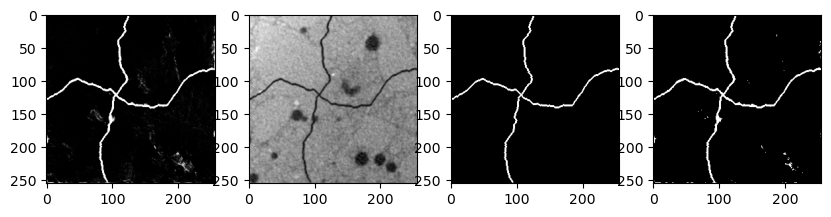

In [37]:
tic = time.perf_counter()
k = LN(test_full2)
toc = time.perf_counter()
print(toc-tic)
k1 = k[0,0,:,:].detach().numpy()
test1 = test_full2[0,0,:,:].detach().numpy()
test2 = test_fully2[0,0,:,:].detach().numpy()

k2 = k1.copy()
t = 0.5
k2[k2 < t] = 0
k2[k2 >= t] = 1

fig, ax = plt.subplots(1,4, figsize=(10,10))
ax[0].imshow(k1, cmap='gray')
ax[1].imshow(test1, cmap='gray')
ax[2].imshow(test2, cmap='gray')
ax[3].imshow(k2, cmap='gray')

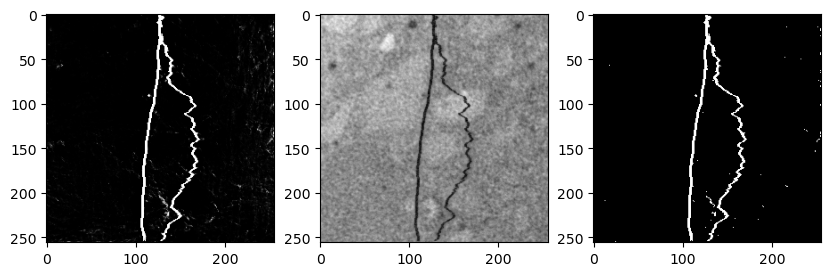

In [41]:
path_input = 'dataset_cracks/input/crack_2_256_w3_10.tif'

test_x = io.imread(path_input)
temp1 = test_x[1,:,:]
test = torch.from_numpy(temp1).float()
test_x2 = test.reshape([1,1,256,256])
test_x2 = MinMaxNormalization(test_x2)

k = LN(test_x2)

k1 = k[0,0,:,:].detach().numpy()
test1 = test_x2[0,0,:,:].detach().numpy()
k2 = k1.copy()
t = 0.5
k2[k2 < t] = 0
k2[k2 >= t] = 1


fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(k1, cmap='gray')
ax[1].imshow(test1, cmap='gray')
ax[2].imshow(k2, cmap='gray')

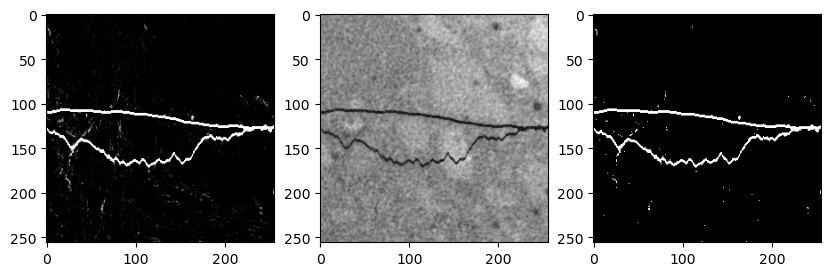

In [42]:
path_input = 'dataset_cracks/input/crack_2_256_w3_10.tif'
test_x_rot = np.rot90(test_x, k=1, axes=(2,1))
temp1 = test_x_rot[1,:,:]
temp1 = temp1.copy()
test = torch.from_numpy(temp1).float()
test_x2 = test.reshape([1,1,256,256])
test_x2 = MinMaxNormalization(test_x2)

k = LN(test_x2)

k1 = k[0,0,:,:].detach().numpy()
test1 = test_x2[0,0,:,:].detach().numpy()
k2 = k1.copy()
t = 0.5
k2[k2 < t] = 0
k2[k2 >= t] = 1


fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(k1, cmap='gray')
ax[1].imshow(test1, cmap='gray')
ax[2].imshow(k2, cmap='gray')

# Validation on unseen image of unseen scale 5
(model was trained only on scale 3)

1.0317758999990474


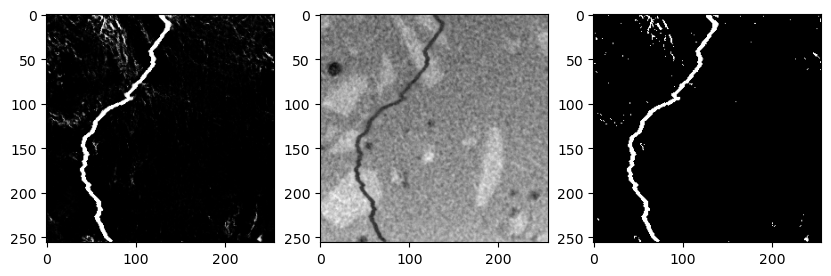

In [43]:
path_input = 'dataset_cracks/input/crack_1_256_w5_1.tif'

test_x = io.imread(path_input)
temp1 = test_x[1,:,:]
test = torch.from_numpy(temp1).float()
test_x2 = test.reshape([1,1,256,256])
test_x2 = MinMaxNormalization(test_x2)

tic = time.perf_counter()
k = LN(test_x2)
toc = time.perf_counter()
print(toc-tic)

k1 = k[0,0,:,:].detach().numpy()
test1 = test_x2[0,0,:,:].detach().numpy()
k2 = k1.copy()
t = 0.5
k2[k2 < t] = 0
k2[k2 >= t] = 1

fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(k1, cmap='gray')
ax[1].imshow(test1, cmap='gray')
ax[2].imshow(k2, cmap='gray')

In [44]:
path_ground = 'dataset_cracks/labels/crack_1_256_w5_1.tif'
test_g = io.imread(path_ground)
temp_g = test_g[1,:,:]
temp_g = temp_g.flatten()
k1 = k[0,0,:,:].detach().numpy()
k2 = k1.copy()
t = 0.5
k2[k2 < t] = 0
k2[k2 >= t] = 1
k2 = k2.flatten()

print(confusion_matrix(temp_g, k2))

res = []
prec = metrics.precision_score(temp_g, k2)
res.append(prec)
rec = metrics.recall_score(temp_g, k2)
res.append(rec)
f1 = metrics.f1_score(temp_g, k2)
res.append(f1)
print(res)

[[63633   532]
 [    8  1363]]
[0.7192612137203166, 0.9941648431801605, 0.8346601347213718]


# Validation on same cracks with two different widths
(model was trained only on scale 3)


1.0825580999990052


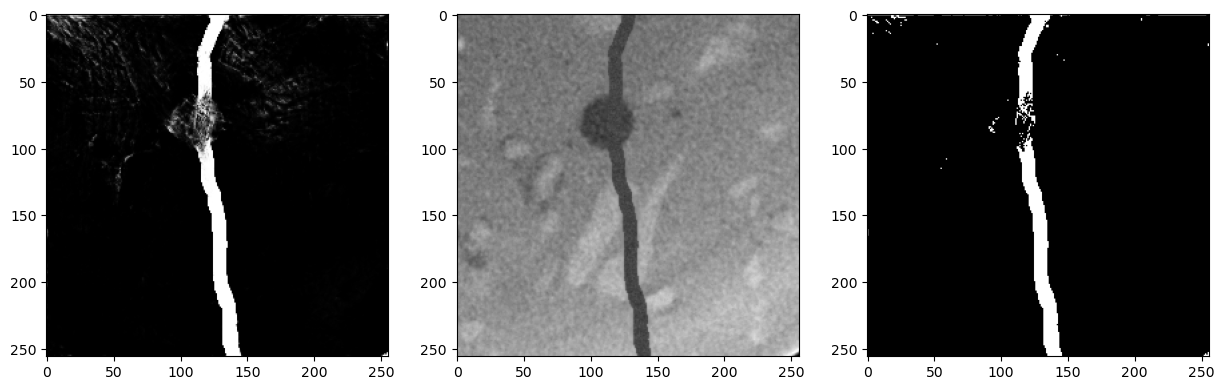

In [46]:
path_input = 'dataset_cracks/test_imgs/crack-input-mid.tif'

test_x = io.imread(path_input)
temp1 = test_x[1,:,:]
test = torch.from_numpy(temp1).float()
test_x2 = test.reshape([1,1,256,256])
test_x2 = MinMaxNormalization(test_x2)

tic = time.perf_counter()
k = LN(test_x2)
toc = time.perf_counter()
print(toc-tic)

k1 = k[0,0,:,:].detach().numpy()
test1 = test_x2[0,0,:,:].detach().numpy()
k2 = k1.copy()
t = 0.5
k2[k2 < t] = 0
k2[k2 >= t] = 1

fig, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(k1, cmap='gray')
ax[1].imshow(test1, cmap='gray')
ax[2].imshow(k2, cmap='gray')

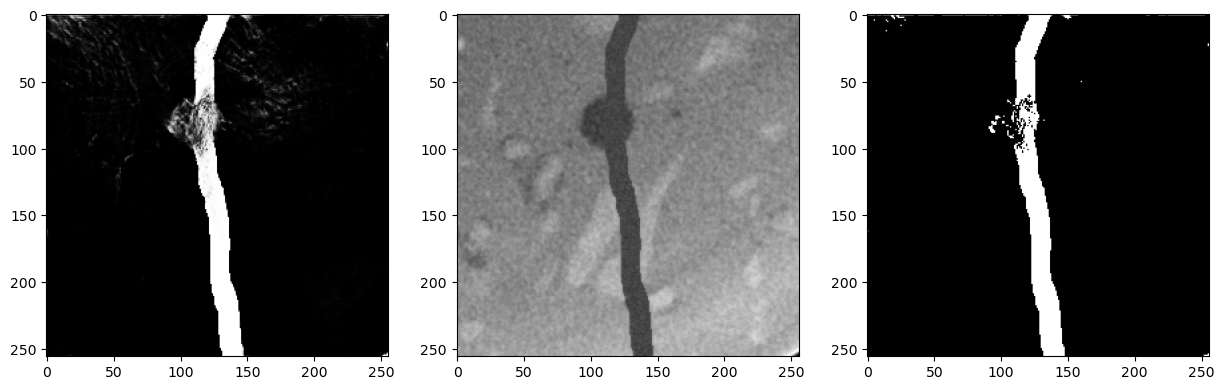

In [48]:
path_input = 'dataset_cracks/test_imgs/crack-input-thick.tif'
test_x = io.imread(path_input)
temp1 = test_x[1,:,:]
test = torch.from_numpy(temp1).float()
test_x2 = test.reshape([1,1,256,256])
test_x2 = MinMaxNormalization(test_x2)

k = LN(test_x2)

k1 = k[0,0,:,:].detach().numpy()
test1 = test_x2[0,0,:,:].detach().numpy()
k2 = k1.copy()
t = 0.5
k2[k2 < t] = 0
k2[k2 >= t] = 1

fig, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(k1, cmap='gray')
ax[1].imshow(test1, cmap='gray')
ax[2].imshow(k2, cmap='gray')

# Validation on real cracks with varying width
(model was trained only on scale 3)

25.977940199998557


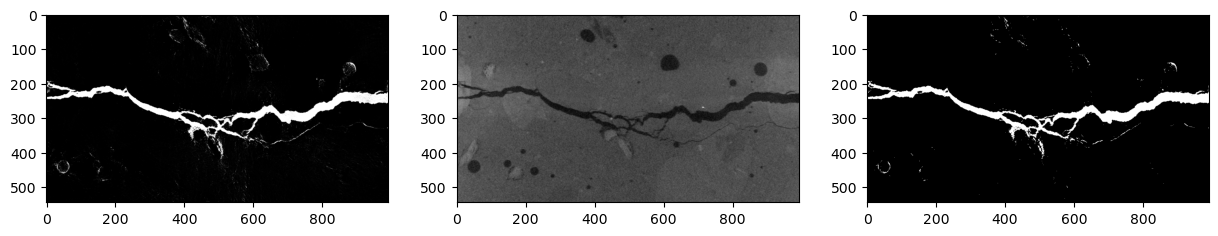

In [57]:
path_input = 'dataset_cracks/test_imgs/real-ex2-crop.jpg'
test_x = io.imread(path_input)
temp1 = test_x
temp1 = temp1.copy()
test = torch.from_numpy(temp1).float()
test_x2 = test.reshape([1,1, 544,992])
test_x2 = MinMaxNormalization(test_x2)

tic = time.perf_counter()
k = LN(test_x2)
toc = time.perf_counter()
print(toc-tic)

k1 = k[0,0,:,:].detach().numpy()
test1 = test_x2[0,0,:,:].detach().numpy()
k2 = k1.copy()
t = 0.5
k2[k2 < t] = 0
k2[k2 >= t] = 1

fig, ax = plt.subplots(1,3, figsize=(15,25))
ax[0].imshow(k1, cmap='gray')
ax[1].imshow(test1, cmap='gray')
ax[2].imshow(k2, cmap='gray')

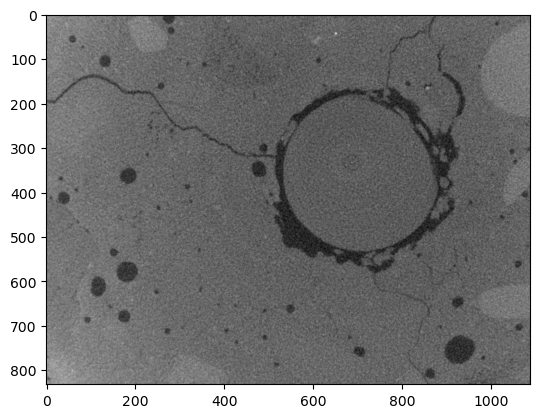

In [69]:
path_input = 'dataset_cracks/test_imgs/real-ex1-crop.jpg'

test_x = io.imread(path_input)
test_x_rot = np.array(test_x)
temp1 = test_x_rot
test = torch.from_numpy(temp1).float()
test_x2 = test.reshape([1,1, 832,1088])
test_x2 = MinMaxNormalization(test_x2)

plt.imshow(test_x2.detach().numpy()[0,0,:,:], cmap='gray')

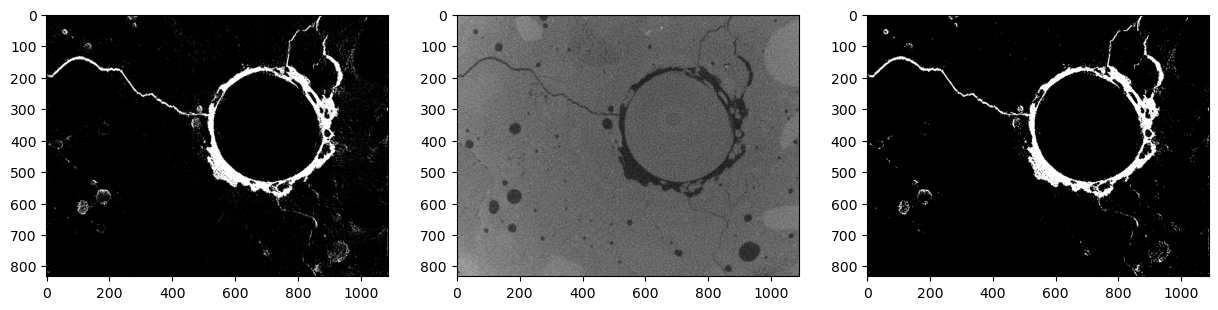

In [70]:
k = LN(test_x2)

k1 = k[0,0,:,:].detach().numpy()
test1 = test_x2[0,0,:,:].detach().numpy()
k2 = k1.copy()
t = 0.5
k2[k2 < t] = 0
k2[k2 >= t] = 1

fig, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(k1, cmap='gray')
ax[1].imshow(test1, cmap='gray')
ax[2].imshow(k2, cmap='gray')

(336, 1295, 3)


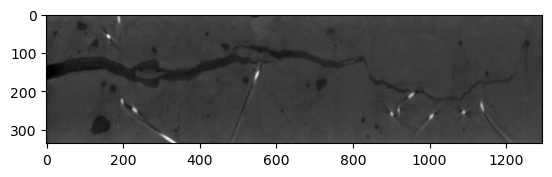

In [78]:
path_input = 'dataset_cracks/test_imgs/sample33-1-crop.jpg'

test_x = io.imread(path_input)
test_x_rot = np.array(test_x)
temp1 = test_x_rot[:,:,0]
test = torch.from_numpy(temp1).float()
test_x2 = test.reshape([1,1,336, 1295])
test_x2 = MinMaxNormalization(test_x2)

plt.imshow(test_x2.detach().numpy()[0,0,:,:], cmap='gray')

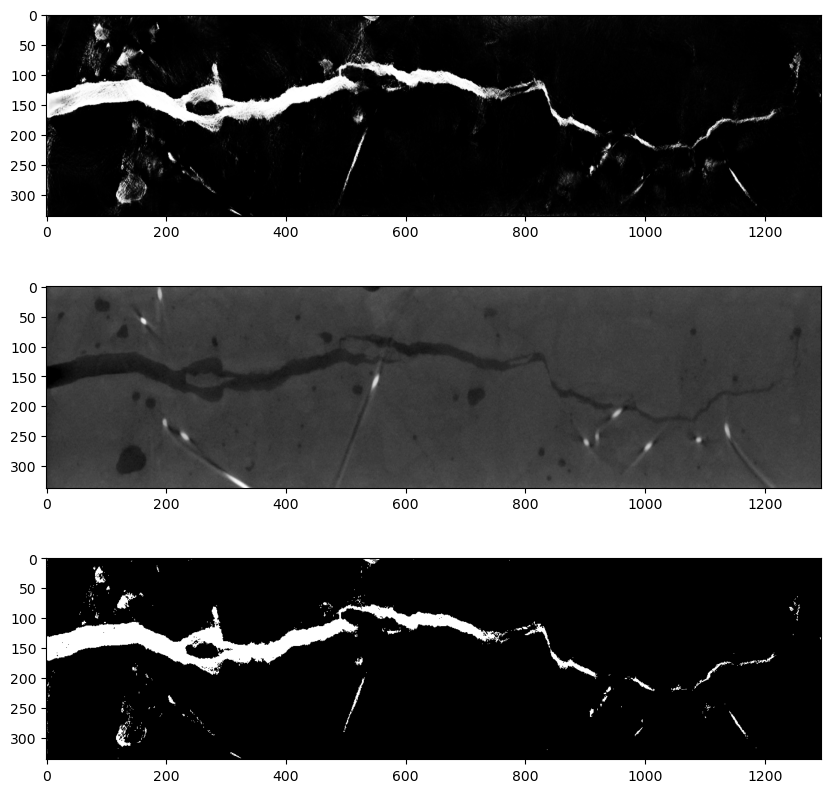

In [79]:
k = LN(test_x2)

k1 = k[0,0,:,:].detach().numpy()
test1 = test_x2[0,0,:,:].detach().numpy()
k2 = k1.copy()
t = 0.5
k2[k2 < t] = 0
k2[k2 >= t] = 1

fig, ax = plt.subplots(3,1, figsize=(10,10))
ax[0].imshow(k1, cmap='gray')
ax[1].imshow(test1, cmap='gray')
ax[2].imshow(k2, cmap='gray')